In [1]:
import glob
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json
from mpl_toolkits.axes_grid1 import make_axes_locatable


path_ray_results = "/home/thorsten/ray_results/IntersectionExample/"
folder_results = "PPO_MultiAgentIntersectionEnv_sharedPolicy_TeamSpirit-v0_0_2019-03-30_18-08-54osfmm20k"
folder_results_teamspirit = "/results_140_all"

In [2]:
def getMetrics(folder_logs):
    filenames_log = glob.glob( folder_logs + "/log_*.csv")

    csvList = []

    for file_ in filenames_log:
        df = pd.read_csv(file_,index_col=None, header=0)
        csvList.append(df)
        
    veh_poss_1 = []
    veh_poss_2 = []

    s_1 = 0
    s_2 = 0
    s_2nd = 0
    
    times = []

    for csv in csvList:
        veh_poss_1.append(csv[['veh_pos_1']].values)
        veh_poss_2.append(csv[['veh_pos_2']].values)
        times.append(np.arange(csv[['veh_pos_1']].values.size)/10.0)
        
    n_episodes = 0
    n_nr2first = 0

    for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
        n_episodes += 1
        s_1 += veh_pos_1[-2]-veh_pos_1[0]
        s_2 += veh_pos_2[-2]-veh_pos_2[0]
        if veh_pos_2[-2] > veh_pos_1[-2]:
            n_nr2first += 1
            s_2nd += veh_pos_1[-2]
        else:
            s_2nd += veh_pos_2[-2]
    
    
    
    n_episodes = 0
    n_nr2first = 0
    n_notFarEnough = 0
    n_successfull = 0

    for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
        n_episodes += 1
        if veh_pos_2[-2] > 46.2+13 or veh_pos_1[-2] > 46.2+13:
            n_successfull += 1
            if veh_pos_2[-2] > veh_pos_1[-2]:
                n_nr2first += 1
        else:
            n_notFarEnough += 1

    return n_nr2first/n_successfull, n_successfull/n_episodes, ((s_1+s_2)/2)/n_episodes, s_2nd/n_episodes

In [3]:
k1s = np.zeros((21,21))
k2s = np.zeros((21,21))
k3s = np.zeros((21,21))
k4s = np.zeros((21,21))

for teamspirit_0 in range(-10,11):
    print(teamspirit_0)
    for teamspirit_1 in range(-10,11):
        folder_logs = "/results_run_200" + "_" + str(teamspirit_0/10.0) + "_" + str(teamspirit_1/10.0)
        try:
            k1,k2,k3,k4 = getMetrics(path_ray_results+folder_results+folder_logs)
            k1s[teamspirit_0+10][teamspirit_1+10] = k1
            k2s[teamspirit_0+10][teamspirit_1+10] = k2
            k3s[teamspirit_0+10][teamspirit_1+10] = k3
            k4s[teamspirit_0+10][teamspirit_1+10] = k4
        except:
            print("Exception")

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


Text(0, 0.5, 'Teamspirit 2')

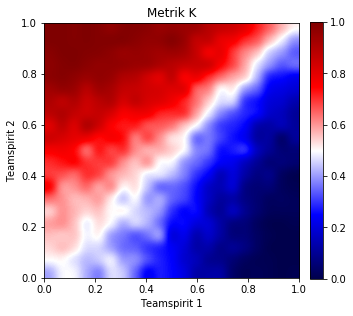

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
img = ax.imshow(k1s,cmap='seismic',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
plt.title("Metrik K")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")

Text(0, 0.5, 'Teamspirit 2')

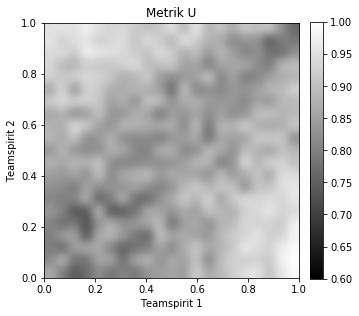

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
img = ax.imshow(k2s,cmap='gray',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
img.set_clim(0.6,1)
plt.title("Metrik U")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")

Text(0, 0.5, 'Teamspirit 2')

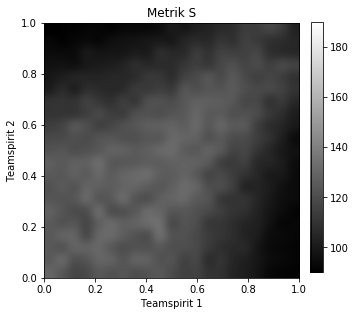

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
img = ax.imshow(k4s,cmap='gray',origin='lower',interpolation='Gaussian',extent=[0,1,0,1])
plt.colorbar(img,fraction=0.046, pad=0.04)
img.set_clim(90,190)
plt.title("Metrik S")
plt.xlabel("Teamspirit 1")
plt.ylabel("Teamspirit 2")